
## Step 1: Import Libraries

In this step, you’ll import basic Python libraries for data analysis.

- `pandas` for tables (like Excel)
- `numpy` for math (mean, std dev, arrays)
- `matplotlib.pyplot` and `seaborn` for charts
- `statsmodels` for regression

👉 Operators: `import` keyword, `as` to shorten names.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


## Step 2: Load Your Stock Return Data 📈

Here you’ll **mount your Google Drive**, locate your file, and load it into a **DataFrame**.

- Use `from google.colab import drive` to mount Drive.
- Use `pd.read_excel()` to read Excel files.
- Use `.head()` to preview.

👉 Operators: `from`, `import`, function calls, dot notation `.head()`


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Change the path if needed
file_path = '/content/drive/MyDrive/QM717-2025/Dataset/Masco  review session.xlsx'

# Load Excel file
masco_df = pd.read_excel(file_path)
masco_df['date'] = pd.to_datetime(masco_df['date'])
masco_df.head()

,PERMNO,date,RET,vwretd,sprtrn
0,34032,2004-01-30,-0.021525,0.023042,0.017276
1,34032,2004-02-27,0.051763,0.015443,0.012209
2,34032,2004-03-31,0.085592,-0.010662,-0.016359
3,34032,2004-04-30,-0.074573,-0.024222,-0.016791
4,34032,2004-05-28,0.033559,0.014068,0.012083



## Step 3: Visualize relationship - Scatter Plot




What you’re doing:

Use plt.scatter() to see how Masco returns (Y) relate to S&P 500 returns (X).

Each dot is one month.

Why:

You see if the points cluster along a trend → shows if a line makes sense.

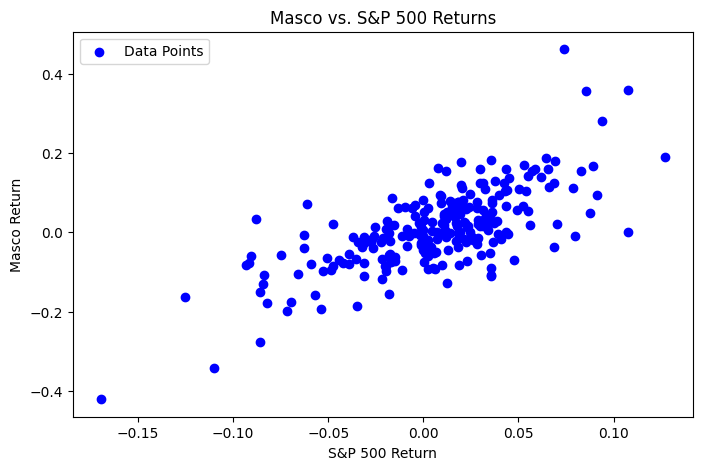

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(masco_df['sprtrn'], masco_df['RET'], color='blue', label='Data Points')
plt.xlabel('S&P 500 Return')
plt.ylabel('Masco Return')
plt.title('Masco vs. S&P 500 Returns')
plt.legend()
plt.show()


## Step 4: Regression with statsmodels

Use `statsmodels` to get the proper least squares fit.

Operators: `sm.add_constant()`, `sm.OLS()`, `.fit()`, `.summary()`.


In [6]:
X = masco_df['sprtrn']
X = sm.add_constant(X)
y = masco_df['RET']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     240.4
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           6.03e-38
Time:                        17:46:09   Log-Likelihood:                 293.66
No. Observations:                 240   AIC:                            -583.3
Df Residuals:                     238   BIC:                            -576.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.005     -0.095      0.9

What’s Most Important

Slope (Beta): 1.67 → Masco is more volatile than the market; its returns amplify the market movement.

R-squared: 50% → The market explains about half of Masco’s monthly return variability.

Significance (P-values):

S&P 500 coefficient is highly significant → your regression line is meaningful.